# Segment images in Python using K-Means clustering.

In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import cv2

In [31]:
from ipywidgets import FileUpload
from IPython.display import display
import io
from PIL import Image as PILImage

image_file=FileUpload(accept='image/*',multiple=False)
display(image_file)

FileUpload(value=(), accept='image/*', description='Upload')

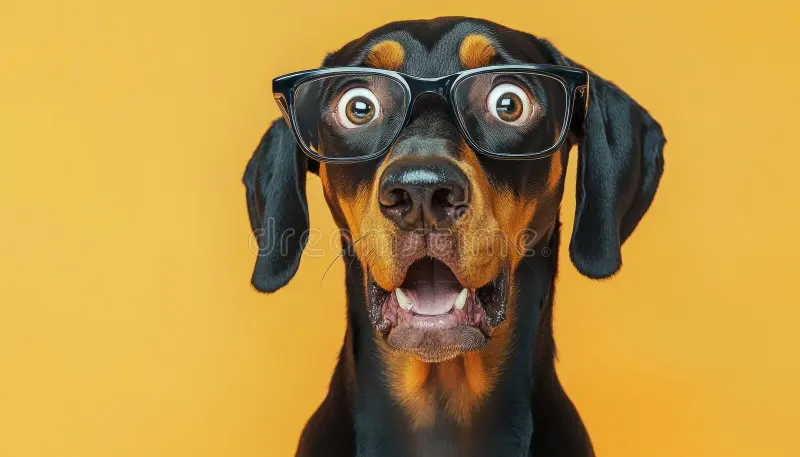

Image shape: (457, 800, 3)
Image dtype: uint8


In [32]:
def image_process(image_file):
    for fileinfo in image_file.value:
        img_bytes = io.BytesIO(fileinfo['content'])
        image = PILImage.open(img_bytes).convert("RGB")
        display(image)
        image_array = np.array(image)
        
        print("Image shape:", image_array.shape)
        print("Image dtype:", image_array.dtype)
        return image_array

image_array = image_process(image_file)

In [33]:
#Reshape Image Array
image_reshape = image_array.reshape(-1, 3)
image_reshape

array([[234, 196,  81],
       [234, 196,  81],
       [234, 196,  81],
       ...,
       [234, 178,  61],
       [234, 178,  61],
       [234, 178,  61]], shape=(365600, 3), dtype=uint8)

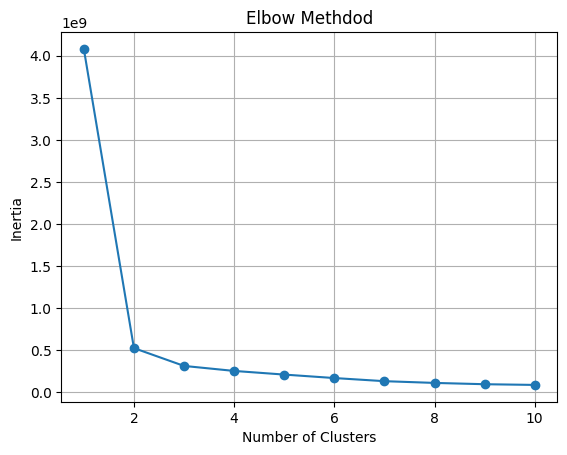

In [34]:
inertias = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k).fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel('Inertia')
plt.title('Elbow Methdod')
plt.grid()
plt.show()

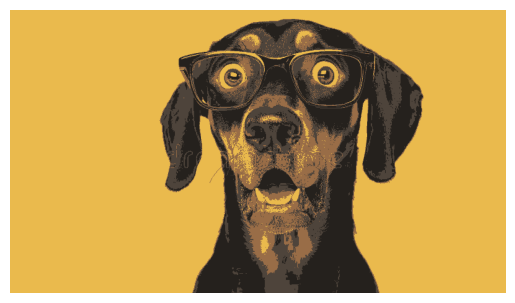

In [35]:
#Apply k-means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

#Get the cluster centers (dominant colors)
dominant_colors = kmeans.cluster_centers_.astype(int)

#Optionally recreate a clustered image
labels = kmeans.labels_
clustered_img = dominant_colors[labels].reshape(image_array.shape)

#Show the result
plt.imshow(clustered_img.astype('uint8'))
plt.axis('off')
plt.show()

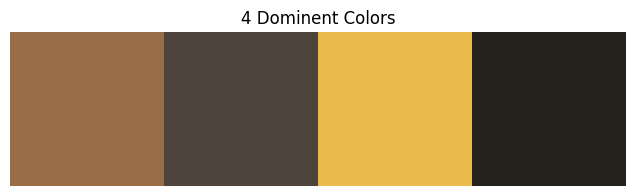

In [36]:
def plot_color_band(colors):
    # Create a band of shape (height, width, 3)
    height = 50
    width_per_color = 50
    band = np.zeros((height, width_per_color * len(colors), 3), dtype='uint8')

    for i, color in enumerate(colors):
        band[:, i*width_per_color:(i+1)*width_per_color, :] = color

    plt.figure(figsize=(8,2))
    plt.imshow(band)
    plt.axis('off')
    plt.title(f'{len(colors)} Dominent Colors')
    plt.show()

plot_color_band(dominant_colors)